In [1]:
import pandas as pd
import matplotlib.pyplot as plt # for Visualization
import seaborn as sns # UI yang lebih bagus tapi diatas matplotlib

df_text = pd.read_csv("../csv/jago_preprocessing.csv")

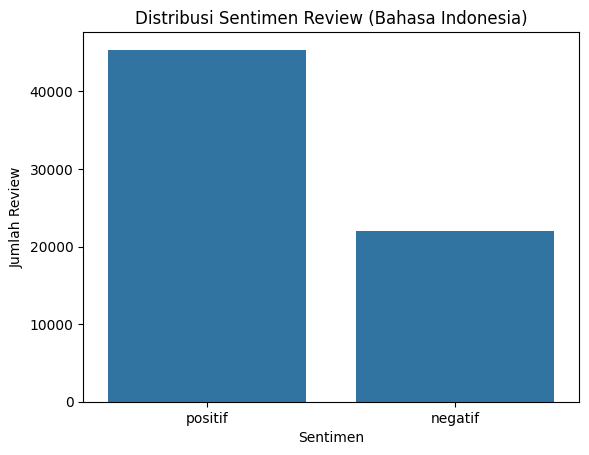

In [2]:
sns.countplot(data=df_text, x="sentiment")
plt.title("Distribusi Sentimen Review (Bahasa Indonesia)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.show()

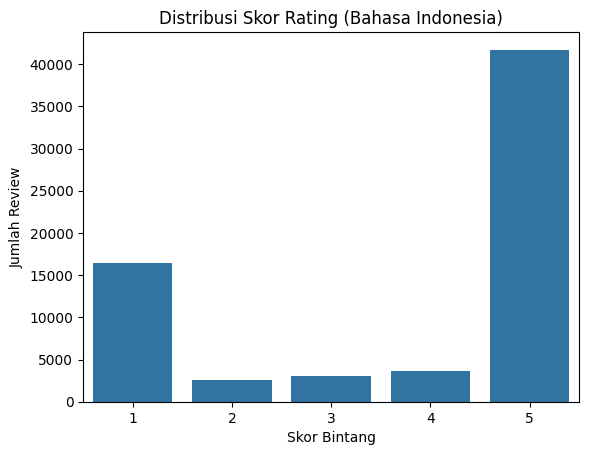

In [3]:
sns.countplot(data=df_text, x="score")
plt.title("Distribusi Skor Rating (Bahasa Indonesia)")
plt.xlabel("Skor Bintang")
plt.ylabel("Jumlah Review")
plt.show()

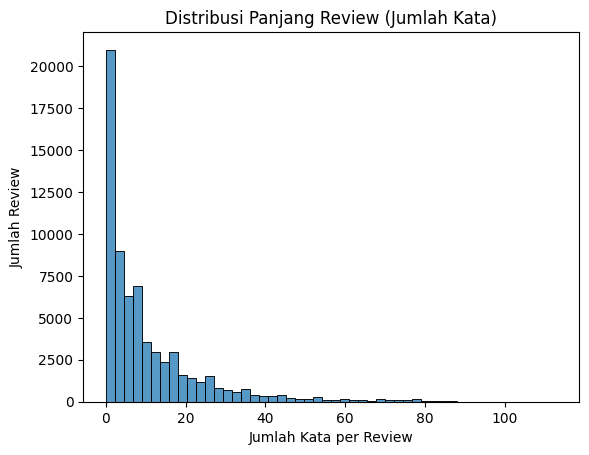

In [4]:
df_text["review_length"] = df_text["clean_text"].fillna("").str.split().apply(len)

sns.histplot(df_text["review_length"], bins=50)
plt.title("Distribusi Panjang Review (Jumlah Kata)")
plt.xlabel("Jumlah Kata per Review")
plt.ylabel("Jumlah Review")
plt.show()

In [5]:
from collections import Counter
import ast

# Kalau kolom tokens tersimpan sebagai string di CSV, ubah jadi list dulu
df_text["tokens"] = df_text["tokens"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Pisahkan token review negatif dan positif
neg_tokens = df_text[df_text["sentiment"] == "negatif"]["tokens"].sum()
pos_tokens = df_text[df_text["sentiment"] == "positif"]["tokens"].sum()

# Hitung 20 kata paling sering
top_neg = Counter(neg_tokens).most_common(20)
top_pos = Counter(pos_tokens).most_common(20)


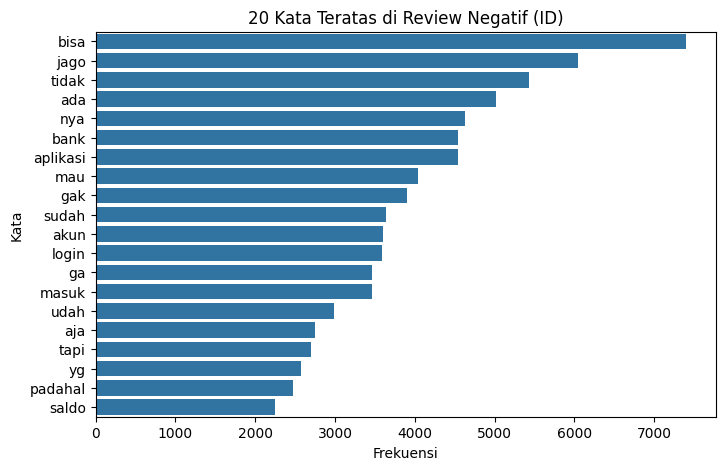

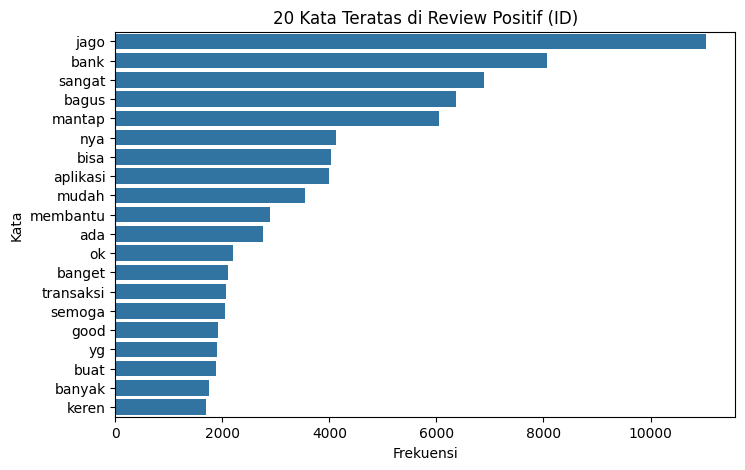

In [ ]:
# kata yang sering muncul per sentimen
import matplotlib.pyplot as plt
import seaborn as sns

neg_words, neg_counts = zip(*top_neg)
plt.figure(figsize=(8,5))
sns.barplot(x=neg_counts, y=neg_words)
plt.title("20 Kata Teratas di Review Negatif (ID)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()

pos_words, pos_counts = zip(*top_pos)
plt.figure(figsize=(8,5))
sns.barplot(x=pos_counts, y=pos_words)
plt.title("20 Kata Teratas di Review Positif (ID)")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()
